In [8]:
import pandas as pd
df = pd.read_csv('data.csv', index_col='Id')

## Tag analysis
Before diving in the analysis _per se_, let's have a look at the different tags used. It will give us a better understanding of the situation and, with a bit of work, we might already be able to spot some trends.

We want to do a few things with those tags. We want to have a look at what the bulk of the questions are about and we also want to see if there are some common combinations. All this will eventually be plotted against the "Quality" of a post to try and identify trends.

### Wordcloud
Let's build a quick function to clean up the `Tags` field and get it in a usable form:

In [9]:
def wc(text):
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'

In [10]:
tags = []
for i in df['Tags'].apply( lambda x:wc(x)):
    for tag in i.split():
        tags.append(tag)

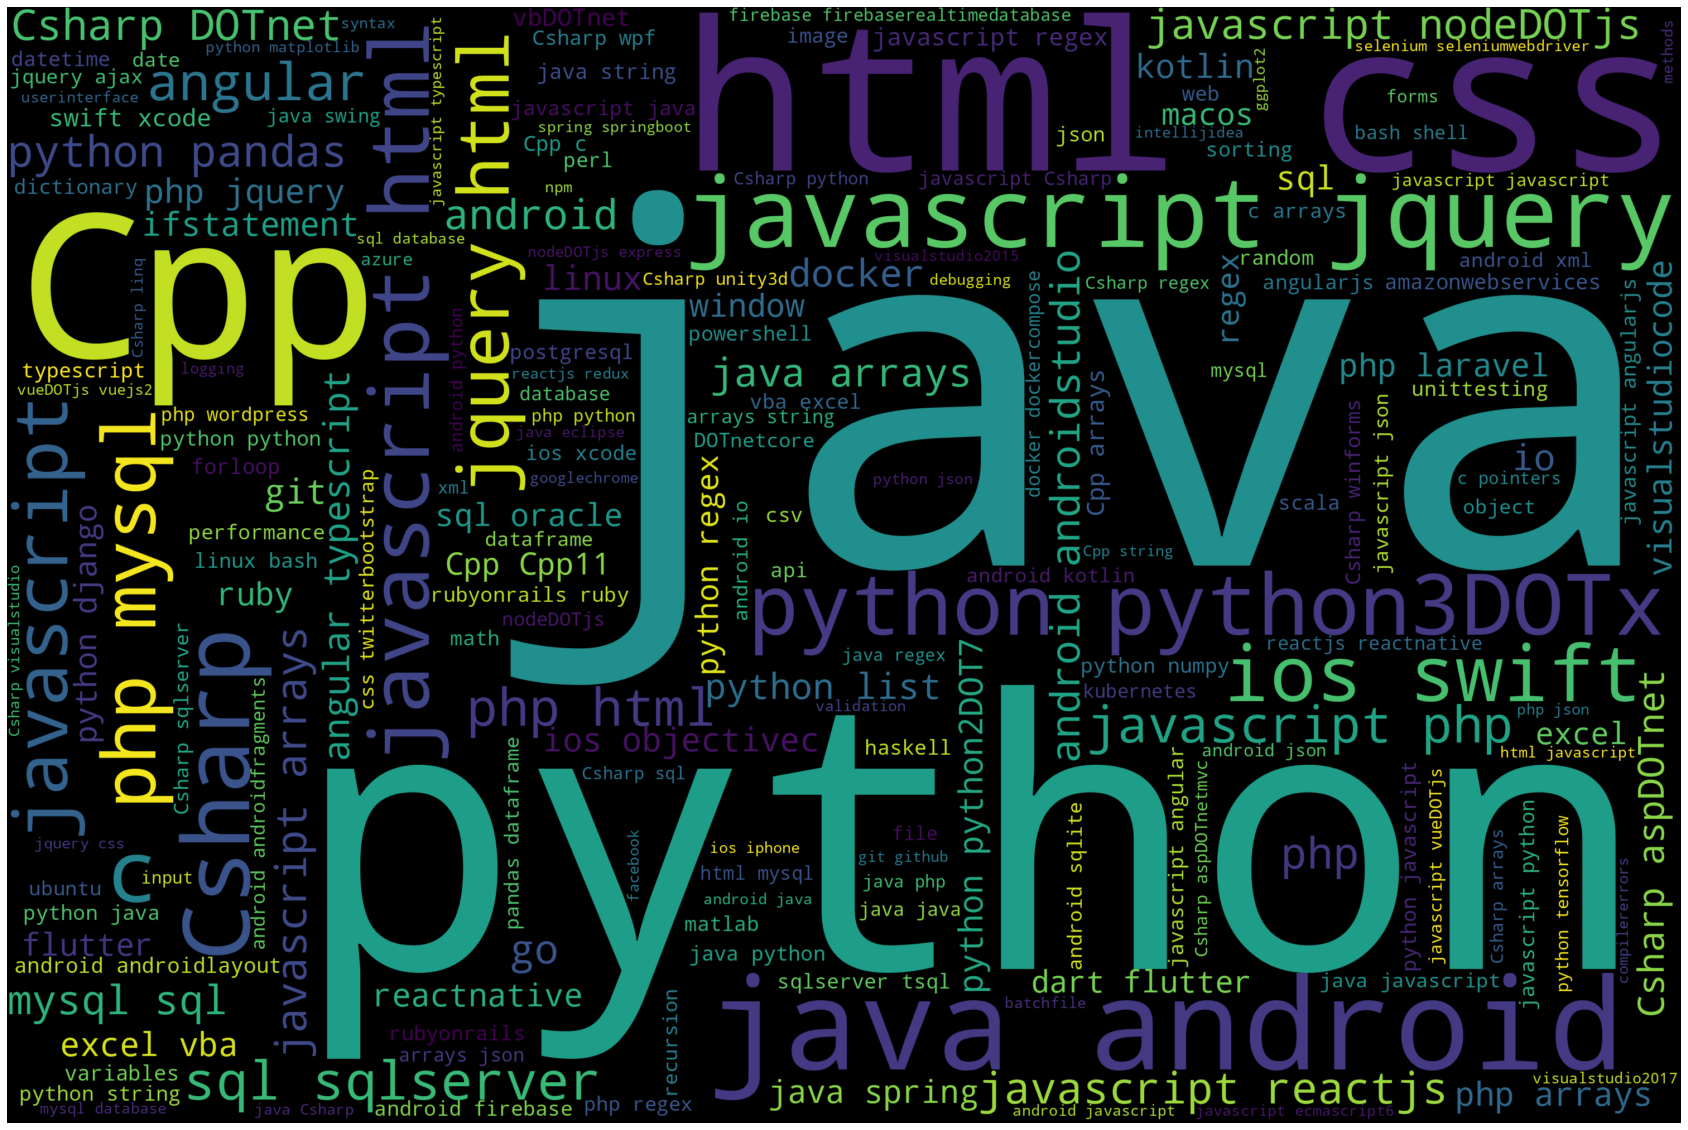

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,30)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      include_numbers=True,
                      regexp='\w+'
                     )

wordcloud.generate(" ".join(tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
wordcloud.words_

{'java': 1.0,
 'python': 1.0,
 'html css': 0.8804682686383241,
 'Cpp': 0.818237831176833,
 'java android': 0.8009858287122612,
 'javascript jquery': 0.758471965495995,
 'Csharp': 0.6925446703635243,
 'c': 0.5884165126309304,
 'python python3DOTx': 0.5730129390018485,
 'javascript html': 0.5428219346888478,
 'ios swift': 0.47566235366605053,
 'javascript': 0.4349969192852742,
 'php mysql': 0.4319162045594578,
 'jquery html': 0.38878619839802836,
 'sql sqlserver': 0.33271719038817005,
 'angular': 0.32224276032039434,
 'php html': 0.314849044978435,
 'javascript php': 0.29944547134935307,
 'javascript reactjs': 0.26062846580406657,
 'php': 0.26001232285890324,
 'python pandas': 0.26001232285890324,
 'Csharp DOTnet': 0.24584103512014788,
 'javascript arrays': 0.24460874922982132,
 'javascript nodeDOTjs': 0.23043746149106592,
 'android': 0.22982131854590265,
 'go': 0.22119531731361675,
 'mysql sql': 0.21934688847812692,
 'android androidstudio': 0.2174984596426371,
 'java arrays': 0.2076401

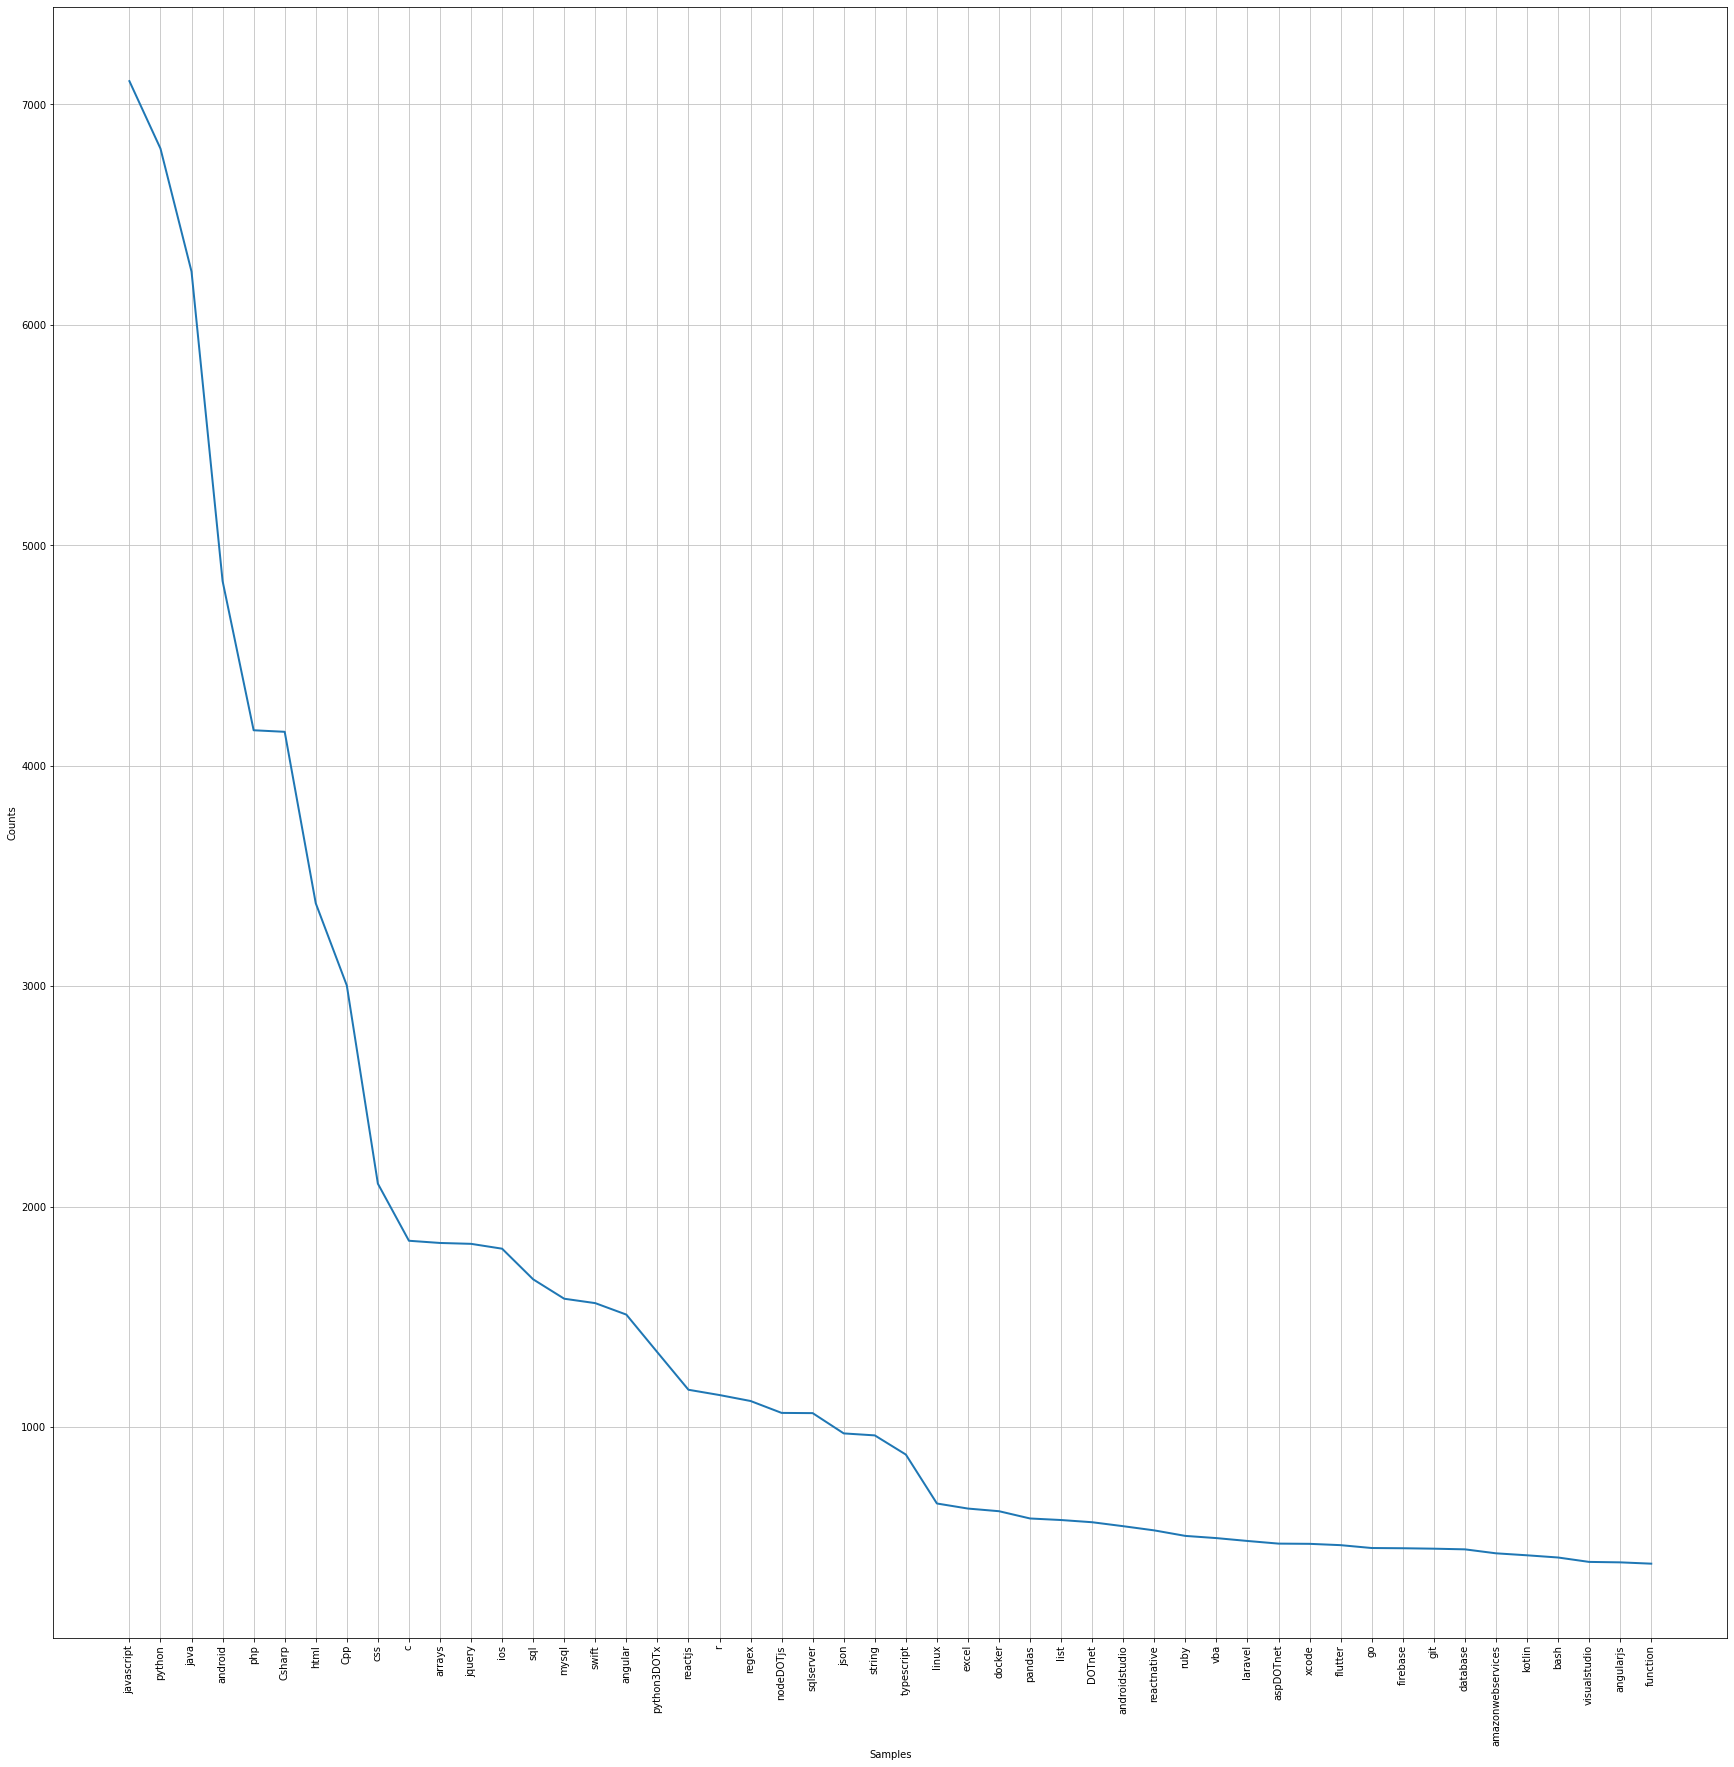

In [16]:
from nltk import FreqDist
FreqDist(tags).plot(50)
plt.show()

From the wordcloud and the FreqDist, we can already see a few things:
- Javascript and Python are the most asked about language, followed by Java.
- Javascript is the most common language on SO but is always paired with other technologies like `html`,`jquery`, etc.
- Talking about pairs, we can already spot a few common ones: meaningful like `java android`, less valuable like `python python 3.x` (which probably "inflates" the python frequency).

## Strategies
### Word focused
If the vocabulary is what you are looking at, the next step is to remove the punctuation and the stopwords. 

With the following code, we are going to generate a list of words used in the `Body` column. It won't be extremely useful for the classification task but comparing vocabulary can be very revealing (given the right subset: spam vs. regular emails,etc.).

Once we have a list of words, we can start the vocabulary analysis by coding a counter or using `FreqDist` from the `nltk` library for example.

In [ ]:
wordcloud.words_

In [ ]:
from nltk import word_tokenize
for text in df['Body']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words = [word for word in tokens if word not in stop_words]

In [ ]:
from nltk.corpus import stopwords
import string

stop_words = list(string.punctuation)
stop_words += stopwords.words('english')

In [ ]:
def toklowstop(text):
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words = [word for word in tokens if word not in stop_words]
    return words

In [ ]:
df['Body'].apply(lambda x: toklowstop(x))

In [ ]:
FreqDist(words).plot(50)
plt.show()

## Wordcloud
Wordclouds are to text data what pie charts are to numerical data. They are at best confusing and at worst useless. But it can be generate a nice picture for your article header :)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      stopwords = stop_words)

wordcloud.generate(" ".join(words))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Stemming
This process is going to remove the ending of the words, shrinking them to their stem, their common denominator. For example, in the following list:
- programmer
- programmation
- programmed
- programming
- program
- programme

The stem of these words is **program**. It is easy to imagine a stemmed document being harder to read (by a human at least) but at the same time, it is going to be easier to compare different documents. This "normalization" is going to help make a model more robust as the ambiguity is reduced.

It is worth noting:
- there are a lot of stemming algorithms, available in various languages. [nltk.stem API module](https://www.nltk.org/api/nltk.stem.html) will give you a list of stemming classes available with NLTK.
- whilst stemming simplifies a document, it also creates "new" noise:  the stem for "flies" is "fli" for example.
- whilst stemming simplifies a document, it will induce a loss of information. For example, in the "program" list above, programme is the British spelling and program, the American spelling. If the origin of the review is not an important information for your analysis: Great, stemming has made this simpler! However if the localisation is key to your problem, you might miss some nuances by stemming your documents.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
def stem(document):
    """
    Stemming words using 
    """
    doc_split = document.split(' ')
    stemmed = ''
    for word in doc_split:
        stemmed += stemmer.stem(word) + ' '
        
    return stemmed

## Lemmatisation